In [1]:
import torch.nn as nn
from src import train_sdf, get_sdf_data_loader, GatUNet2, borderless_loss, clamped_loss, plot_sdf_results

In [3]:
# get data
n_objects = 300
data_folder = "../mesh/"
batch_size = 10
edge_method = 'edge' # or 'proximity'
edge_params = {'radius': 0.05}
train_data, test_data = get_sdf_data_loader(n_objects, data_folder, batch_size, eval_frac=0.2,
                                            edge_method=edge_method, edge_params=edge_params)

preparing sdf data loader


In [4]:
# choose model
in_channels, hidden_channels, out_channels = 3, [32, 64, 128, 64, 32], 1
model = GatUNet2(in_channels, hidden_channels, out_channels)

In [10]:
# train parameters
gamma       = 0.2
lr_0        = 0.001
n_epoch     = 750
step_size   = 250
print_every = 25
save_name   = "gat_gunet" + edge_method

In [11]:
# choose loss functions; see src/loss.py for details of parameters 
loss_funcs = [borderless_loss, clamped_loss]
losses_params = {"loss_func": nn.L1Loss, "radius": 0.1, "maxv": 0.05}
train_sdf(model, train_data, test_data, loss_funcs, n_epoch=n_epoch, print_every=print_every,
          save_name=save_name, lr_0=lr_0, step_size=step_size, gamma=gamma, **losses_params)

best gpu is 0 with 24.2 Gb available space


KeyboardInterrupt: 

preparing sdf data loader


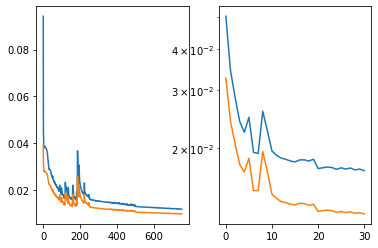

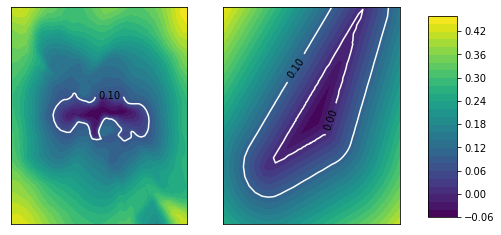

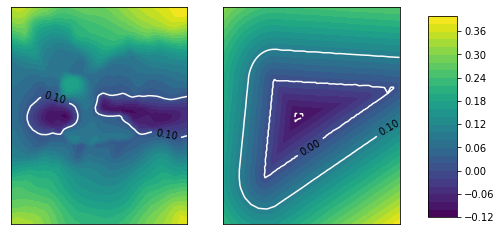

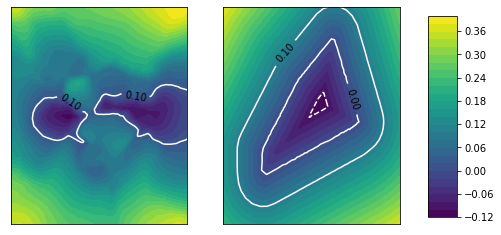

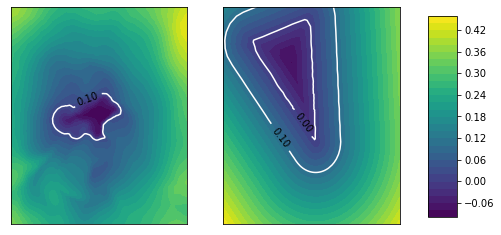

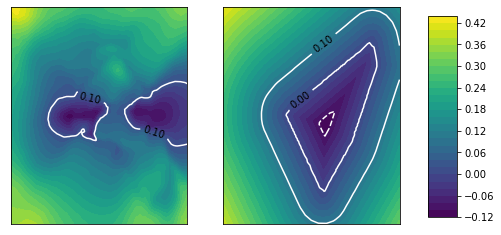

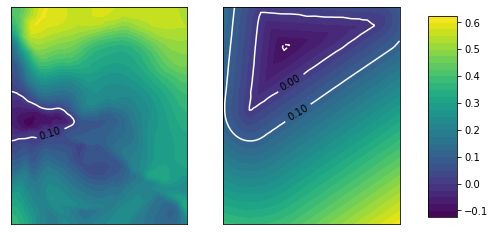

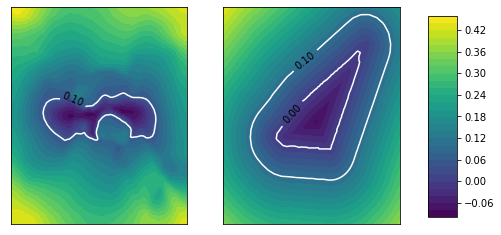

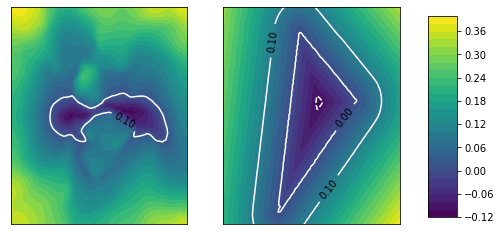

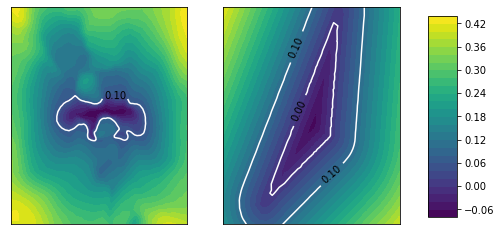

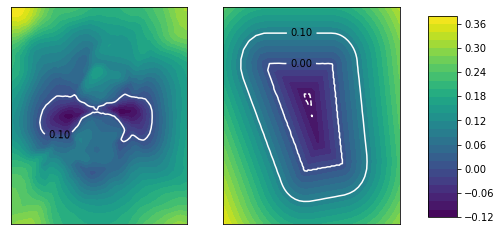

In [12]:
# visualization
data_loader, _ = get_sdf_data_loader(10, data_folder, 1, eval_frac=0, edge_method=edge_method, edge_params=edge_params)
output_func = lambda x: x.numpy()[:, 0]
plot_sdf_results(model, data_loader, save_name=save_name, output_func=output_func, levels=[-0.1, 0., 0.1])